In [1]:
import os
import numpy as np
from mmsdk import mmdatasdk as md
import mosei_utils
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset
import tqdm.notebook
from collections import defaultdict
import CorrelationScript

In [2]:
train, dataset, features, label_field = CorrelationScript.align_train()

[2022-05-29 08:16:57.530] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_TimestampedWordVectors.csd ...


  1%|          | 45/3837 [00:00<00:08, 440.91 Computational Sequence Entries/s]

[2022-05-29 08:16:59.194] | Status  | Checking the integrity of the <glove_vectors> computational sequence ...
[2022-05-29 08:16:59.194] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2022-05-29 08:17:08.007] | Success | <glove_vectors> computational sequence data in correct format.
[2022-05-29 08:17:08.007] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2022-05-29 08:17:08.007] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2022-05-29 08:17:08.013] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_VisualFacet42.csd ...


  1%|          | 40/3837 [00:00<00:09, 398.81 Computational Sequence Entries/s]

[2022-05-29 08:17:09.732] | Status  | Checking the integrity of the <FACET 4.2> computational sequence ...
[2022-05-29 08:17:09.733] | Status  | Checking the format of the data in <FACET 4.2> computational sequence ...


[2022-05-29 08:17:20.267] | Success | <FACET 4.2> computational sequence data in correct format.
[2022-05-29 08:17:20.267] | Status  | Checking the format of the metadata in <FACET 4.2> computational sequence ...
[2022-05-29 08:17:20.267] | Warning | <FACET 4.2> computational sequence does not have all the required metadata ... continuing 
[2022-05-29 08:17:20.270] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_COVAREP.csd ...


  1%|          | 47/3836 [00:00<00:08, 458.99 Computational Sequence Entries/s]

[2022-05-29 08:17:21.694] | Status  | Checking the integrity of the <COVAREP> computational sequence ...
[2022-05-29 08:17:21.694] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2022-05-29 08:17:29.618] | Success | <COVAREP> computational sequence data in correct format.
[2022-05-29 08:17:29.619] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2022-05-29 08:17:29.619] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2022-05-29 08:17:29.621] | Success | Computational sequence read from file cmumosei/pose_features_all.csd ...
[2022-05-29 08:17:29.654] | Status  | Checking the integrity of the <pose_features> computational sequence ...
[2022-05-29 08:17:29.655] | Status  | Checking the format of the data in <pose_features> computational sequence ...
[2022-05-29 08:17:29.738] | Success | <pose_features> computational sequence data in correct format.
[2022-05-29 08:17:29.738] | Status  | Checking the format of the metadata in <pose_features> computational sequence ...
[2022-05-29 08:17:29.738] | Success | <pose_features> computational sequence metadata in correct format.


[2022-05-29 08:17:31.764] | Status  | Pre-alignment done for <CMU_MOSEI_COVAREP> ...
[2022-05-29 08:17:31.811] | Status  | Pre-alignment done for <hand_r_features> ...
[2022-05-29 08:17:31.961] | Status  | Pre-alignment done for <CMU_MOSEI_VisualFacet42> ...


Aligning -tANM6ETl_M:   9%|▊         | 18/209 [00:00<00:01, 174.54 Segments/s]

[2022-05-29 08:17:31.994] | Status  | Pre-alignment done for <pose_features_all> ...
[2022-05-29 08:17:32.151] | Status  | Pre-alignment done for <hand_l_features> ...
[2022-05-29 08:17:32.160] | Status  | Alignment starting ...



Aligning tkzdanzsA0A:  95%|█████████▌| 199/209 [00:01<00:00, 179.10 Segments/s]


[2022-05-29 08:17:40.661] | Success | Alignment to <CMU_MOSEI_TimestampedWordVectors> complete.
[2022-05-29 08:17:40.661] | Status  | Replacing dataset content with aligned computational sequences
[2022-05-29 08:17:40.776] | Success | Initialized empty <CMU_MOSEI_TimestampedWordVectors> computational sequence.
[2022-05-29 08:17:40.776] | Status  | Checking the format of the data in <CMU_MOSEI_TimestampedWordVectors> computational sequence ...
[2022-05-29 08:17:40.782] | Success | <CMU_MOSEI_TimestampedWordVectors> computational sequence data in correct format.
[2022-05-29 08:17:40.782] | Status  | Checking the format of the metadata in <CMU_MOSEI_TimestampedWordVectors> computational sequence ...
[2022-05-29 08:17:40.782] | Warning | <CMU_MOSEI_TimestampedWordVectors> computational sequence does not have all the required metadata ... continuing 
[2022-05-29 08:17:40.783] | Success | Initialized empty <CMU_MOSEI_VisualFacet42> computational sequence.
[2022-05-29 08:17:40.783] | Status  

  3%|▎         | 100/3293 [00:00<00:03, 989.43 Computational Sequence Entries/s]

[2022-05-29 08:17:42.234] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2022-05-29 08:17:42.234] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2022-05-29 08:17:45.605] | Success | <All Labels> computational sequence data in correct format.
[2022-05-29 08:17:45.605] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2022-05-29 08:17:45.605] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 
[2022-05-29 08:17:45.606] | Status  | Unify was called ...
[2022-05-29 08:17:45.612] | Warning | -mqbVkbCndg entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.615] | Warning | 266852 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.617] | Warning | _JcML8u5Wes entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.620] | Warning | F59hwsm4Ld0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.622] | Warning | jPGDFrQLD4I entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.625] | Warning | hlYDicOj2m0 entry is not sha

[2022-05-29 08:17:45.813] | Warning | ctMCSUT2LlQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.816] | Warning | 236442 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.818] | Warning | lzVA--tIse0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.821] | Warning | 255224 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.824] | Warning | owT0_Xfu8a0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.826] | Warning | 5Fs_7A_V2kA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.828] | Warning | N0d2JL7JC1s entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.830] | Warning | 96350 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.833] | Warning | 96o9hxy64wI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:45.835] | Warning | 91y7nPEWdmQ ent

[2022-05-29 08:17:46.022] | Warning | w-PFjo89Dpw entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.025] | Warning | -l_53IwQoj0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.027] | Warning | WJ2QF4Kw9Y8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.029] | Warning | g99kISQbyuI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.031] | Warning | XAgD-xoil40 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.033] | Warning | aWwjhcYLbRw entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.035] | Warning | YgyqX4aZ4tE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.037] | Warning | 89ZmOPOilu4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.039] | Warning | kPn-t6NSxfQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.042] | Warning |

[2022-05-29 08:17:46.227] | Warning | badtXoOJaf8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.230] | Warning | 4Z47qIrVil4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.233] | Warning | 112604 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.235] | Warning | N7tS7A0WWpM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.237] | Warning | AG5EY8ZaFj4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.240] | Warning | Jz9nlw15QZo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.242] | Warning | 2cwNG0YuwtQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.244] | Warning | 207812 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.247] | Warning | 50103 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.250] | Warning | _26JmJnPKfM ent

[2022-05-29 08:17:46.451] | Warning | 271594 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.453] | Warning | 7r4vRxKLFCA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.455] | Warning | EMS14J0odIE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.458] | Warning | wLj_gnNON7A entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.460] | Warning | XVWiAArXYpE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.462] | Warning | QUpI5kMw_nA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.464] | Warning | 7npCA0zoQ8Q entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.466] | Warning | 4lKz4xyCmkk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.468] | Warning | 252097 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.470] | Warning | y1gL_Muok

[2022-05-29 08:17:46.656] | Warning | xjsaS-LeZ14 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.659] | Warning | olVQZV_1rdA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.661] | Warning | eW1vgHE6FRM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.663] | Warning | gvrfI9e5xHQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.665] | Warning | NYuY6HVjMZQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.667] | Warning | Nzh2KkaGwrE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.669] | Warning | 225768 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.671] | Warning | wNx1ZnQ0MDQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.673] | Warning | IKXWSNf4m2k entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.675] | Warning | w4xI

[2022-05-29 08:17:46.864] | Warning | IB0lGIxP8YY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.866] | Warning | dxsPkcG-Q30 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.868] | Warning | ihuGFUrzD30 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.870] | Warning | nD1R4UedEDo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.873] | Warning | 2W-U94hXuK0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.875] | Warning | bcns0Gu66D8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.877] | Warning | 261267 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.879] | Warning | 6IUj6jyoTl0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.881] | Warning | AsrhHuCfvF4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:46.883] | Warning | HD17

[2022-05-29 08:17:47.075] | Warning | o5OsO6Aq9pA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.077] | Warning | ta26Z2YEVMQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.079] | Warning | 8VhVf0TbjDA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.082] | Warning | DjcZrtcBZi4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.084] | Warning | s1Yo_MCiMPc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.086] | Warning | RdExUaEIWIk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.088] | Warning | XAazxiP6tP0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.090] | Warning | sPxoGNvnVzg entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.092] | Warning | 37459 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.094] | Warning | RB3HA

[2022-05-29 08:17:47.294] | Warning | ip8xwAr4MRE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.297] | Warning | 2Ky9DBSl49w entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.299] | Warning | ky7Q5onqxGw entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.301] | Warning | grePRQ8zonA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.303] | Warning | K0m1tO3Ybyc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.305] | Warning | ak7N0BqMluI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.308] | Warning | JlmpDdm1A1Y entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.310] | Warning | j6R1NTrosuM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.312] | Warning | -vxjVxOeScU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.315] | Warning |

[2022-05-29 08:17:47.501] | Warning | We5nTulz1Vs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.504] | Warning | z441aDJvAcU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.506] | Warning | hhK7q30p0Jk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.508] | Warning | 222116 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.511] | Warning | 3gA34VxBijI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.514] | Warning | 3At-BKm9eYk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.516] | Warning | v_8QeoNc4QY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.518] | Warning | 275620 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.521] | Warning | WSjlhBDxNW8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.524] | Warning | ZW4Oe_fKJ

[2022-05-29 08:17:47.725] | Warning | e7_2U4lm6TE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.729] | Warning | nDXKvarLEOM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.731] | Warning | Ezn3p5FWF_U entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.734] | Warning | OLP0nCKwU6k entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.736] | Warning | X0jMZoxUL2A entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.739] | Warning | MSmTFZ_-THM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.741] | Warning | VS7xSvno7NA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.744] | Warning | 265959 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.747] | Warning | 3w9I5SBhHNc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.750] | Warning | g9rN

[2022-05-29 08:17:47.952] | Warning | 184784 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.955] | Warning | dlE05KC95uk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.958] | Warning | pnSRLB6anIM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.960] | Warning | QIonRUsCqBs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.962] | Warning | SSNrLu-eZiM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.964] | Warning | qlDiE1d45Bc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.967] | Warning | 7xiu1tAJ2d8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.970] | Warning | 0uftSGdwo0Q entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.974] | Warning | 75RGHaxmUK8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:47.976] | Warning | lWf5

[2022-05-29 08:17:48.160] | Warning | 6qPjYvdZiLA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.162] | Warning | vqBRkjHWjXM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.164] | Warning | z0y1ZxH1f74 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.166] | Warning | 87400 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.168] | Warning | 234046 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.170] | Warning | CIqRibqChDQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.172] | Warning | 3DgOMTs3A1E entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.175] | Warning | Rse6laKf1i8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.177] | Warning | 45186 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.179] | Warning | S9PDgK7fpJI entr

[2022-05-29 08:17:48.366] | Warning | 59333 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.368] | Warning | qEkFReBuwxc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.370] | Warning | 81615 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.373] | Warning | sFxUNO2HOKY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.375] | Warning | axQ5CDRawO0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.377] | Warning | 202810 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.379] | Warning | -rxZxtG0xmY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.381] | Warning | xgAwddSkrOo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.383] | Warning | l4oMbKDuW3Y entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.385] | Warning | 1RxliidxXyQ entr

[2022-05-29 08:17:48.576] | Warning | Itqbc2TBXWY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.579] | Warning | 257531 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.581] | Warning | 25271 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.584] | Warning | L3b9wwZ8vRQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.586] | Warning | -AUZQgSxyPQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.588] | Warning | XFJQJb0yaKY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.590] | Warning | Iemw8vqt-54 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.592] | Warning | mNurUl_Q2UY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.595] | Warning | wd8VQ5E7o7o entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.599] | Warning | sRex0-9yFF

[2022-05-29 08:17:48.783] | Warning | TZXcQemh8n8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.785] | Warning | k5ZOshC2LP4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.788] | Warning | RTzDzj4NxIM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.790] | Warning | jjbOD6u7V34 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.792] | Warning | BSKAHXFYF_I entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.795] | Warning | EujJ0SwiCRE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.798] | Warning | 238889 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.801] | Warning | CT7QOWbhfv4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.804] | Warning | 198112 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:48.809] | Warning | x-oexIBWw

[2022-05-29 08:17:49.006] | Warning | 96361 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.010] | Warning | 6T1GHj7qwYs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.012] | Warning | CBYQDIqucxE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.015] | Warning | P35dyIit1yM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.017] | Warning | 5qQs9Cfydo4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.019] | Warning | BRzjQHYWbSs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.021] | Warning | L5a2ijeWpUI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.023] | Warning | kiR5zVo2zvU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.026] | Warning | n7K5SpMrQt0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.028] | Warning | gLTxa

[2022-05-29 08:17:49.216] | Warning | MMaEsDdBsvM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.218] | Warning | BRdw-_dbJXc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.220] | Warning | kmgsC68hIL8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.222] | Warning | rvQ2cRnroOU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.224] | Warning | TqMh7U3J4D4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.227] | Warning | QnYlpSeVOYo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.229] | Warning | 9ceYD_OzPz8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.231] | Warning | I9iV9q3ePhI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.234] | Warning | gLdRUsLw4CA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.236] | Warning |

[2022-05-29 08:17:49.423] | Warning | tw2xFbfgV4U entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.426] | Warning | mN1Z5xEOy10 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.428] | Warning | 5RVF_3YBUVI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.430] | Warning | OiMkqEH5WeE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.432] | Warning | y3r2kk8zvl0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.434] | Warning | 25522 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.436] | Warning | vYOr36tdcpc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.438] | Warning | 6TKaGMkO69E entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.440] | Warning | 6PLlauWxF5E entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.442] | Warning | zR-kK

[2022-05-29 08:17:49.632] | Warning | j4MpQ6CKoDE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.634] | Warning | rhQB8e999-Q entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.636] | Warning | zoPOeViAdOo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.638] | Warning | HAid0IEUoFQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.640] | Warning | fi7g4GoK-z4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.642] | Warning | 4VA4kqMnEqA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.644] | Warning | FdTczBnXtYU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.646] | Warning | 79644 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.648] | Warning | 6slq62RwH3Q entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.650] | Warning | 9pzn9

[2022-05-29 08:17:49.837] | Warning | YgyeyooSz0g entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.840] | Warning | pwj9YeMJC08 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.842] | Warning | RVC8l5hf2Eg entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.844] | Warning | 273531 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.846] | Warning | SD6wphlw72U entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.848] | Warning | C5-cY1nPQ20 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.850] | Warning | AQ4Pktv4-Gc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.852] | Warning | 2o2ljA0QD7g entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.854] | Warning | 7BFhRPlSOf0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:49.856] | Warning | ARNW

[2022-05-29 08:17:50.058] | Warning | jVayR0VClxQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.060] | Warning | ffrJ91swyq0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.062] | Warning | etPDgRjrnJ8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.065] | Warning | 5QXHyL3BMto entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.067] | Warning | uXYAfpQUYVE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.068] | Warning | 128752 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.070] | Warning | fDYZINwIs_A entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.072] | Warning | 1F0qH0EEBfo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.074] | Warning | _BvNNdEkhZA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.076] | Warning | LJGL

[2022-05-29 08:17:50.264] | Warning | HJTxq72GuMs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.267] | Warning | LDKWr94J0wM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.269] | Warning | 7vJy1zbopJ8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.271] | Warning | NG7QLq4XlWo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.273] | Warning | eJfT7-dDqzA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.275] | Warning | 120vnZnmhq4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.277] | Warning | 267466 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.279] | Warning | FCMbWx2JpZ0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.281] | Warning | ioupaiAuRr0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.283] | Warning | 9609

[2022-05-29 08:17:50.475] | Warning | Xa086gxLJ3Y entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.478] | Warning | sIGAq2J4KKI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.480] | Warning | 25t8nrkUfRY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.482] | Warning | PtdK-TLOuD0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.484] | Warning | 11UtTaDYgII entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.486] | Warning | VVtx4IDsHZA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.488] | Warning | KXsjl0DKgL0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.489] | Warning | 7rMLN0KKE5k entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.492] | Warning | MjaaudUc5-4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.494] | Warning |

[2022-05-29 08:17:50.692] | Warning | 0DBfvvIVmqY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.695] | Warning | DlX-WyVe-D0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.697] | Warning | N_dNuV-4iAo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.699] | Warning | nmWplIQhvoA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.701] | Warning | ejDe6hQWZOk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.703] | Warning | xaSf1d13WoY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.704] | Warning | 110203 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.707] | Warning | 3lkn8MS3n8Q entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.709] | Warning | 114624 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.711] | Warning | 112223 en

[2022-05-29 08:17:50.900] | Warning | 243646 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.902] | Warning | 4jTUcNlxlYA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.904] | Warning | XyBU_gZtU0M entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.906] | Warning | eTCnM472-cQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.908] | Warning | 2iukwQJjGHE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.910] | Warning | 224599 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.912] | Warning | ItnyexqXR_U entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.914] | Warning | 44MVdpDEQJs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.916] | Warning | 7mb8Y2AhXIY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:50.918] | Warning | 0vXaXWx7R

[2022-05-29 08:17:51.106] | Warning | foXArPhK0xY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.108] | Warning | 266396 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.110] | Warning | cfX_iuhCbRY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.112] | Warning | goMtnNHQ_z4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.114] | Warning | PJlDO21zl88 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.116] | Warning | wLJohZMqR-g entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.118] | Warning | Arh2TKRi_mg entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.119] | Warning | Viz5vDE39y8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.121] | Warning | mpfSRGHFY0g entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.123] | Warning | mfpR

[2022-05-29 08:17:51.313] | Warning | YmGfjU5PGyE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.315] | Warning | v45zoIrjoTo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.317] | Warning | 2-4autDbHVQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.319] | Warning | vM9AH4EqCaA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.320] | Warning | 6hFiTU77Sm0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.322] | Warning | hfVXx8hfKak entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.324] | Warning | tymso_pAxhk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.325] | Warning | Q7nhtfkIPN4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.327] | Warning | pRdxEaLB8r4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.329] | Warning |

[2022-05-29 08:17:51.519] | Warning | rFHIApgUtoI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.521] | Warning | opHUZsc2WO8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.522] | Warning | i6UngvEEuNs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.524] | Warning | skRqBxLLJkE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.526] | Warning | 98187 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.528] | Warning | VhKJm_jiciU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.530] | Warning | uU_3tbZ1zG8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.531] | Warning | 107585 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.533] | Warning | r46amqjpWgg entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.535] | Warning | -MeTTeMJBN

[2022-05-29 08:17:51.725] | Warning | 257247 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.728] | Warning | 244623 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.729] | Warning | wF8980oGklk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.731] | Warning | LZl9Sj1safM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.733] | Warning | 8NPaDkOiXw4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.735] | Warning | 167521 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.737] | Warning | F2M7WbPXRps entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.738] | Warning | dOSyvhYsfFo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.740] | Warning | ViyQVpGW05w entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.742] | Warning | r8Jyl2Bfl14 en

[2022-05-29 08:17:51.936] | Warning | SuIcJvERiFk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.938] | Warning | ipLoS44xfO4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.941] | Warning | wMggOhhVouA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.943] | Warning | CdB8QBhFccs entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.945] | Warning | Q5YU2sLKVL4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.948] | Warning | UNLD7eYPzfQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.951] | Warning | fB816aeHRFk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.953] | Warning | 243341 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.955] | Warning | gXuiIWRxrw4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:51.957] | Warning | ogGw

[2022-05-29 08:17:52.142] | Warning | nHMHePX9WoU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.144] | Warning | GMjQUrlMa50 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.146] | Warning | 238023 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.148] | Warning | 31tcuDMQ_H8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.150] | Warning | YUNxD04EvfE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.151] | Warning | tXQpm-nKxNA entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.153] | Warning | -uywlfIYOS8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.155] | Warning | 4kF0U8kIMp4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.156] | Warning | flBtk736di4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.158] | Warning | rC29

[2022-05-29 08:17:52.349] | Warning | xomMHflvVDw entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.351] | Warning | 63951 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.353] | Warning | dWfgSGnd9zM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.355] | Warning | dLmtsRyRH4s entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.356] | Warning | sU40irMa-so entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.358] | Warning | qJZlp9uxoTU entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.360] | Warning | sRMdbZVjhis entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.361] | Warning | frCWtiam4tE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.363] | Warning | 259260 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.365] | Warning | C2xNDBU2Z0

[2022-05-29 08:17:52.554] | Warning | c6wuh0NRG1s entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.556] | Warning | VgqI1KRnDSw entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.558] | Warning | p7zuPEZgtY4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.560] | Warning | An8x4UfwZ7k entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.562] | Warning | wY8JbFOsp5E entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.564] | Warning | _BtdwH6mfWg entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.566] | Warning | 07Z16yRBFUQ entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.568] | Warning | e0hYEr848TE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.570] | Warning | qFppeQvdfxI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.572] | Warning |

[2022-05-29 08:17:52.760] | Warning | Oj3XwBBrzXc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.762] | Warning | aFhc2ddipoM entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.764] | Warning | VjAvqFXEmmk entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.765] | Warning | xvnFF0FiyS4 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.767] | Warning | hmjfBZGGZR8 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.769] | Warning | OwE-7MwzfYI entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.770] | Warning | 233366 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.772] | Warning | 3ocpWAmSNUE entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.774] | Warning | WovurMxG2Aw entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.776] | Warning | Sb2x

Aligning -tANM6ETl_M:   0%|          | 0/3 [00:00<?, ? Segments/s]
                                                                  
Aligning 1LkYxsqRPZM:   0%|          | 0/3 [00:00<?, ? Segments/s]
                                                                  
Aligning N-NnCI6U52c:   0%|          | 0/2 [00:00<?, ? Segments/s]
                                                                  
Aligning OwYfPi9St0w:   0%|          | 0/1 [00:00<?, ? Segments/s]


[2022-05-29 08:17:52.968] | Warning | 4wuug3-5cWo entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.969] | Warning | X7-Gbk8gAD0 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.971] | Warning | UPghCarcnMc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.973] | Warning | wk5lFk5kFjY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.975] | Warning | 241172 entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.976] | Warning | xZ1FrxU6hcg entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.978] | Warning | F4OhXQTMOEc entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.980] | Warning | 13JpsLvddoY entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.981] | Warning | HIsJqphLCyw entry is not shared among all sequences, removing it ...
[2022-05-29 08:17:52.983] | Warning | fMU


                                                                  
Aligning Va54WZgPTdY:   0%|          | 0/5 [00:00<?, ? Segments/s]
                                                                  
Aligning XQOUZhWI1B0:   0%|          | 0/5 [00:00<?, ? Segments/s]
                                                                  
Aligning pVs1daijYTw:   0%|          | 0/2 [00:00<?, ? Segments/s]
                                                                  
Aligning rWjPSlzUc-8:   0%|          | 0/2 [00:00<?, ? Segments/s]
                                                                  
Aligning tkzdanzsA0A:   0%|          | 0/9 [00:00<?, ? Segments/s]
/Users/Marie/Desktop/IT and Cognition/2 semester/Cognitive Science 2/CMU-MultimodalSDK/CorrelationScript.py:160: RuntimeWarning: invalid value encountered in true_divide
  acoustic = np.nan_to_num((acoustic - acoustic.mean(0, keepdims=True)) / (EPS + np.std(acoustic, axis=0, keepdims=True)))
/Users/Marie/Desktop/IT and Cognitio

[2022-05-29 08:17:53.305] | Success | Alignment to <CMU_MOSEI_Labels> complete.
[2022-05-29 08:17:53.305] | Status  | Replacing dataset content with aligned computational sequences
[2022-05-29 08:17:53.315] | Success | Initialized empty <CMU_MOSEI_TimestampedWordVectors> computational sequence.
[2022-05-29 08:17:53.315] | Status  | Checking the format of the data in <CMU_MOSEI_TimestampedWordVectors> computational sequence ...
[2022-05-29 08:17:53.317] | Success | <CMU_MOSEI_TimestampedWordVectors> computational sequence data in correct format.
[2022-05-29 08:17:53.318] | Status  | Checking the format of the metadata in <CMU_MOSEI_TimestampedWordVectors> computational sequence ...
[2022-05-29 08:17:53.318] | Warning | <CMU_MOSEI_TimestampedWordVectors> computational sequence does not have all the required metadata ... continuing 
[2022-05-29 08:17:53.318] | Success | Initialized empty <CMU_MOSEI_VisualFacet42> computational sequence.
[2022-05-29 08:17:53.318] | Status  | Checking the f

In [29]:
dataset[label_field].metadata

{'alignment compatible': True,
 'computational sequence description': 'Labels for CMU-MOSEI Dataset',
 'computational sequence version': 1.0,
 'contact': 'abagherz@andrew.cmu.edu',
 'creator': 'Amir Zadeh',
 'dataset bib citation': '@inproceedings{cmumoseiacl2018, title={Multimodal Language Analysis in the Wild: {CMU-MOSEI} Dataset and Interpretable Dynamic Fusion Graph}, author={Zadeh, Amir and Liang, Paul Pu and Vanbriesen, Jon and Poria, Soujanya and Cambria, Erik and Chen, Minghai and Morency, Louis-Philippe},booktitle={Association for Computational Linguistics (ACL)},year={2018}}',
 'dataset name': 'CMU-MOSEI',
 'dataset version': 1.0,
 'dimension names': ['sentiment',
  'happy',
  'sad',
  'anger',
  'surprise',
  'disgust',
  'fear'],
 'featureset bib citation': '@online{amt, author = {Amazon},title = {Amazon Mechanical Turk},year = {2017},url = {https://www.mturk.com}}',
 'md5': None,
 'root name': 'All Labels',
 'uuid': 'bbce9ca9-e556-46f4-823e-7c5e0147afab'}

In [132]:
train[7][-1]#[0][2] # 6,7


'o2bNnLOEEC0[1]'

In [82]:
train[17][-1]#[1] # 1, 2,11,12, 13, 14, 15, 16, 17
# '-tANM6ETl_M[2]', N-NnCI6U52c[1]', 'rWjPSlzUc-8[0] 'tkzdanzsA0A[2]'

'tkzdanzsA0A[8]'

In [4]:
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset
import tqdm.notebook
from collections import defaultdict
import torch
import torch.nn.utils.rnn

def multi_collate(batch):
    '''
    Collate functions assume batch = [Dataset[i] for i in index_set]
    '''
    from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
    from torch.utils.data import DataLoader, Dataset
    from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
    from torch.utils.data import DataLoader, Dataset
    import tqdm.notebook
    from collections import defaultdict
    import torch
    import torch.nn.utils.rnn

    # for later use we sort the batch in descending order of length
    batch = sorted(batch, key=lambda x: x[0][0].shape[0], reverse=True)

    # get the data out of the batch - use pad sequence util functions from PyTorch to pad things
    labels = torch.cat([torch.from_numpy(sample[1]) for sample in batch], dim=0)
    sentences = torch.nn.utils.rnn.pad_sequence([torch.LongTensor(sample[0][0]) for sample in batch], padding_value=0)#
    visual = torch.nn.utils.rnn.pad_sequence([torch.FloatTensor(sample[0][1]) for sample in batch])

    acoustic = torch.nn.utils.rnn.pad_sequence([torch.FloatTensor(sample[0][2]) for sample in batch])
    pose = torch.nn.utils.rnn.pad_sequence([torch.FloatTensor(sample[0][3]) for sample in batch])
    lhand = torch.nn.utils.rnn.pad_sequence([torch.FloatTensor(sample[0][4]) for sample in batch])
    rhand = torch.nn.utils.rnn.pad_sequence([torch.FloatTensor(sample[0][5]) for sample in batch])

    # lengths are useful later in using RNNs
    lengths = torch.LongTensor([sample[0][0].shape[0] for sample in batch])
    return sentences, visual, acoustic, pose, lhand, rhand, labels, lengths



train_loader = DataLoader(train, shuffle=True, batch_size=len(train), collate_fn=multi_collate)
train_data = next(iter(train_loader))

print(train_data[0].shape) # Word vectors, padded to maxlen
print(train_data[1].shape) # visual features
print(train_data[2].shape) # acoustic features
print(train_data[3].shape) # Pose
print(train_data[4].shape) # Lhand
print(train_data[5].shape) # Rhand
print(train_data[6].shape) # labels
print(train_data[7].shape) # lengths




torch.Size([68, 18])
torch.Size([68, 18, 35])
torch.Size([68, 18, 74])
torch.Size([68, 18, 25])
torch.Size([68, 18, 21])
torch.Size([68, 18, 21])
torch.Size([18, 7])
torch.Size([18])


### Inspecting correlations
#### Hypotheses

- Facial landmarks of eyes and mouth correlate strongly (>0.5) with higher sentiment (positive or negative). (H1)
- Frequency and amplitude of hand movement correlate strongly (>0.5) with higher sentiment (positive or negative). (H2)
- Pitch correlates strongly (>0.5) with positive sentiment. (H3) 

   


In [154]:
dataset[label_field].metadata['dimension names']

['sentiment', 'happy', 'sad', 'anger', 'surprise', 'disgust', 'fear']

In [5]:
lengths = train_data[7]

# Extract metadata
label_cat = dataset[label_field].metadata['dimension names']
face_cat = dataset[features[1]].metadata['dimension names']
acoustic_cat = dataset[features[2]].metadata['dimension names']
pose_cat = ["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","MidHip","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye", "REar","LEar","LBigToe", "LSmallToe","LHeel","RBigToe","RSmallToe","RHeel" "Background"]
lhand_cat =  np.arange(len(train_data[4][0,0,:])).tolist()
rhand_cat = np.arange(len(train_data[5][0,0,:])).tolist()

In [6]:
import pandas as pd
results = pd.DataFrame(columns=['Features', 'Sentiment', 'Happy', 'Sad', 'Surprise', 'Fear', 'Anger', 'Disgust'])

In [7]:
# Order of the train data
order = {'words':0, 'face':1, 'acoustic':2, 'pose':3, 'lefthand':4, 'righthand':5, 'label':6, 'lenghts':7}
action_units={'AU1': 'Inner brow raiser', 'AU2': 'Outer brow raiser', 
              'AU4':'Brow lowerer', 'AU5': 'Upper lid raiser', 'AU6': 'Cheek raiser', 
              'AU7':'Lid tightener', 'AU9':'Nose wringler', 'AU10':'Upper lip raiser', 
              'AU12':'Lip corner puller', 'AU14':'Dimpler', 'AU15': 'Lip corner depressor', 
              'AU17':'Chin raiser', 'AU20':'Lip stretched', 'AU23': 'Lip tightener', 
              'AU25': 'Lips part', 'AU26':'Jaw drop', 'AU28':'Lip suck', 'AU45': 'Blink'}


In [8]:
mean_faces = np.array([np.mean(train_data[order.get('face')].numpy()[:lengths[i]-1,i,:], axis=0) for i in range(len(train))])
mean_pose = np.array([np.mean(train_data[order.get('pose')].numpy()[:lengths[i]-1,i,:], axis=0) for i in range(len(train))])
mean_lefthand = np.array([np.mean(train_data[order.get('lefthand')].numpy()[:lengths[i]-1,i,:], axis=0) for i in range(len(train))])
mean_righthand = np.array([np.mean(train_data[order.get('righthand')].numpy()[:lengths[i]-1,i,:], axis=0) for i in range(len(train))])
mean_acoustic = np.array([np.mean(train_data[order.get('acoustic')].numpy()[:lengths[i]-1,i,:], axis=0) for i in range(len(train))])


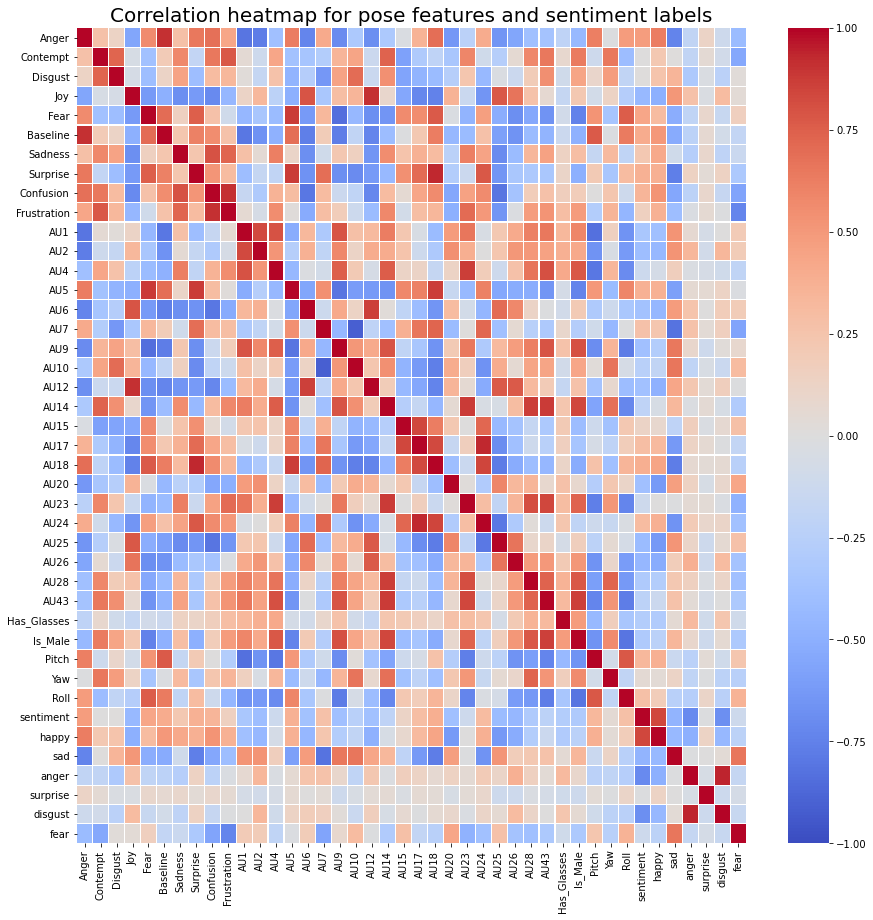

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Heatmap
# Correlation among all columns
correlation_data = pd.DataFrame(np.hstack([mean_faces, train_data[order.get('label')].numpy()]), columns=face_cat+label_cat)
# Removing columns with 0 variance
correlation_data = correlation_data.loc[:, (correlation_data != correlation_data.iloc[0]).any()]
# See correlation and rounding
matrix = correlation_data.corr(method="pearson").round(2)

# Plotting
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(matrix,
            yticklabels=True, 
            vmax=1, 
            vmin=-1, 
            cmap = sns.color_palette("coolwarm", as_cmap=True), 
            center=0,  
            linewidths=0.1)

plt.title("Correlation heatmap for pose features and sentiment labels", fontdict={'fontsize':20})
plt.show()


In [136]:
cols = ['AU1', 'AU2', 'AU4','AU10','AU12', 'AU15','AU20','AU23', 'AU25','AU28'] + ['Right hand'] + ['Left hand'] + ['Nose','RShoulder','RElbow','RWrist','LShoulder','LElbow','LWrist'] + acoustic_cat[:35]
results['Features'] = cols

In [137]:

results



,Features,Sentiment,Happy,Sad,Surprise,Fear,Anger,Disgust
0,AU1,-0.33 (0.19),-0.39 (0.11),0.53 (0.02),-0.07 (0.78),0.2 (0.43),0.07 (0.79),0.0 (0.99)
1,AU2,-0.4 (0.1),-0.44 (0.07),0.53 (0.02),-0.09 (0.71),0.19 (0.44),0.34 (0.17),0.34 (0.16)
2,AU4,-0.12 (0.64),-0.07 (0.78),0.17 (0.49),-0.06 (0.8),-0.2 (0.43),-0.03 (0.91),-0.1 (0.71)
3,AU10,-0.25 (0.32),-0.19 (0.45),0.66 (0.0),-0.04 (0.86),0.31 (0.21),-0.2 (0.42),-0.14 (0.57)
4,AU12,-0.38 (0.12),-0.49 (0.04),0.43 (0.07),0.04 (0.88),-0.01 (0.96),0.23 (0.37),0.17 (0.49)
5,AU15,0.12 (0.64),0.08 (0.77),-0.21 (0.39),-0.03 (0.92),0.28 (0.25),0.17 (0.5),0.07 (0.79)
6,AU20,-0.39 (0.11),-0.62 (0.01),0.47 (0.05),-0.05 (0.86),0.43 (0.07),0.14 (0.57),0.09 (0.72)
7,AU23,-0.11 (0.67),-0.0 (0.98),-0.01 (0.95),0.04 (0.87),-0.48 (0.04),0.05 (0.84),-0.03 (0.91)
8,AU25,-0.42 (0.08),-0.63 (0.01),0.52 (0.03),-0.11 (0.67),0.27 (0.28),0.11 (0.67),0.06 (0.83)
9,AU28,-0.3 (0.22),-0.28 (0.27),0.22 (0.38),-0.03 (0.91),-0.39 (0.11),0.15 (0.55),0.11 (0.66)


In [146]:
# Specific correlations
from scipy import stats
import pprint
# First hypothesis
# Facial landmarks of eyes and mouth correlate strongly (>0.5) with higher sentiment (positive or negative)

# AU5, AU1, AU2, AU4, AU10, AU15, AU20, AU23, AU25

cols = ['AU1', 'AU2', 'AU4','AU10','AU12', 'AU15','AU20','AU23', 'AU25','AU28']

def add_measures(cols, results):
    for col in cols:
        results['Sentiment'].loc[results['Features']==col] = f"{round(stats.pearsonr(x = correlation_data[col], y = correlation_data['sentiment'])[0], 2)} ({round(stats.pearsonr(x = correlation_data[col], y = correlation_data['sentiment'])[1],2)})"
        results['Happy'].loc[results['Features']==col] = f"{round(stats.pearsonr(x = correlation_data[col], y = correlation_data['happy'])[0],2)} ({round(stats.pearsonr(x = correlation_data[col], y = correlation_data['happy'])[1],2)})"
        results['Sad'].loc[results['Features']==col] = f"{round(stats.pearsonr(x = correlation_data[col], y = correlation_data['sad'])[0],2)} ({round(stats.pearsonr(x = correlation_data[col], y = correlation_data['sad'])[1],2)})"
        results['Surprise'].loc[results['Features']==col] = f"{round(stats.pearsonr(x = correlation_data[col], y = correlation_data['surprise'])[0],2)} ({round(stats.pearsonr(x = correlation_data[col], y = correlation_data['surprise'])[1],2)})"
        results['Fear'].loc[results['Features']==col] = f"{round(stats.pearsonr(x = correlation_data[col], y = correlation_data['fear'])[0],2)} ({round(stats.pearsonr(x = correlation_data[col], y = correlation_data['fear'])[1],2)})"
        results['Anger'].loc[results['Features']==col] = f"{round(stats.pearsonr(x = correlation_data[col], y = correlation_data['anger'])[0],2)} ({round(stats.pearsonr(x = correlation_data[col], y = correlation_data['anger'])[1],3)})"
        results['Disgust'].loc[results['Features']==col] = f"{round(stats.pearsonr(x = correlation_data[col], y = correlation_data['disgust'])[0],2)} ({round(stats.pearsonr(x = correlation_data[col], y = correlation_data['disgust'])[1],2)})"

        
    return results

results = add_measures(cols, results)

KeyError: 'AU1'

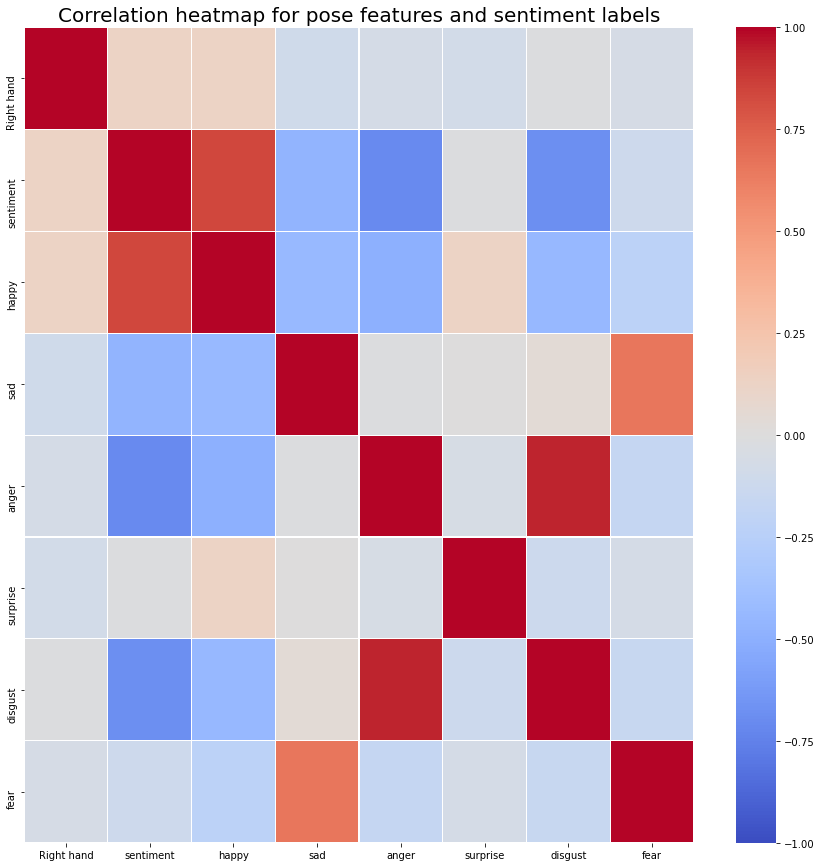

In [147]:
# Second hypothesis
# Frequency and amplitude of hand movement correlate strongly (>0.5) with higher sentiment (positive or negative). (H2)
# Pitch correlates strongly (>0.5) with positive sentiment. (H3)
# Heatmap
# Correlation among all columns
mean_rhand = np.mean(mean_righthand, axis=1).reshape(-1, 1)

correlation_data = pd.DataFrame(np.hstack([mean_rhand, train_data[6].numpy()]), columns=['Right hand']+label_cat)
# Removing columns with 0 variance
correlation_data = correlation_data.loc[:, (correlation_data != correlation_data.iloc[0]).any()]
# See correlation and rounding
matrix = correlation_data.corr(method="pearson").round(2)

# Plotting
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(matrix,
            yticklabels=True, 
            vmax=1, 
            vmin=-1, 
            cmap = sns.color_palette("coolwarm", as_cmap=True), 
            center=0,  
            linewidths=0.1)

plt.title("Correlation heatmap for pose features and sentiment labels", fontdict={'fontsize':20})
plt.show()

cols = ['Right hand']

results = add_measures(cols, results)

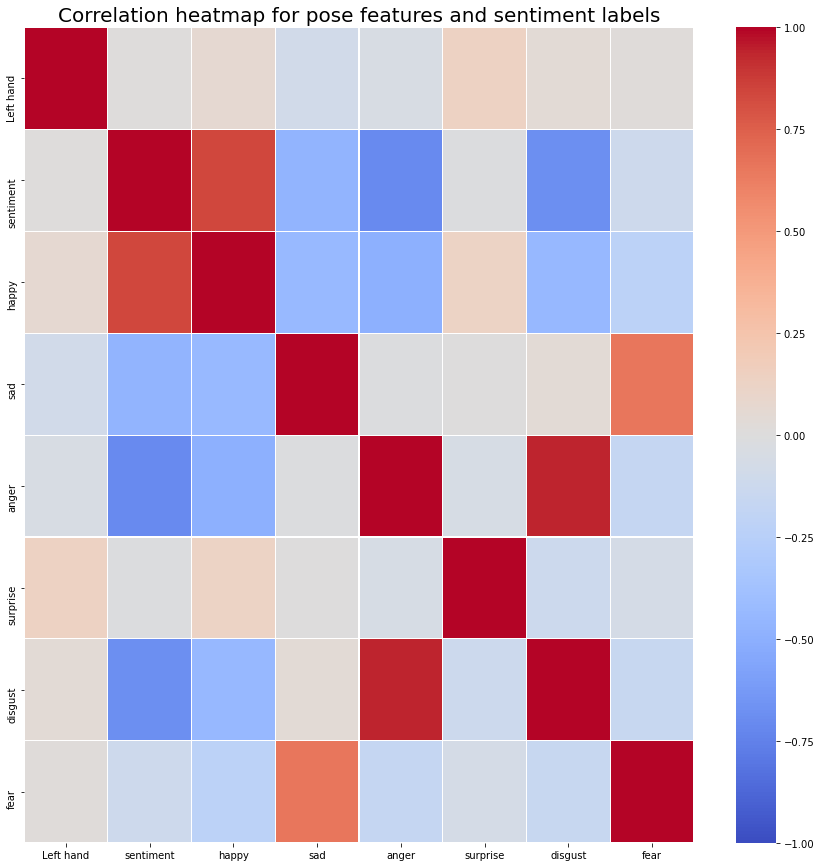

In [148]:
# Second hypothesis
# Frequency and amplitude of hand movement correlate strongly (>0.5) with higher sentiment (positive or negative). (H2)
# Pitch correlates strongly (>0.5) with positive sentiment. (H3)
# Heatmap
# Correlation among all columns
mean_lhand = np.mean(mean_lefthand, axis=1).reshape(-1, 1)
correlation_data = pd.DataFrame(np.hstack([mean_lhand, train_data[6].numpy()]), columns=['Left hand']+label_cat)
# Removing columns with 0 variance
correlation_data = correlation_data.loc[:, (correlation_data != correlation_data.iloc[0]).any()]
# See correlation and rounding
matrix = correlation_data.corr(method="pearson").round(2)

# Plotting
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(matrix,
            yticklabels=True, 
            vmax=1, 
            vmin=-1, 
            cmap = sns.color_palette("coolwarm", as_cmap=True), 
            center=0,  
            linewidths=0.1)

plt.title("Correlation heatmap for pose features and sentiment labels", fontdict={'fontsize':20})
plt.show()

cols = ['Left hand']
results = add_measures(cols, results)

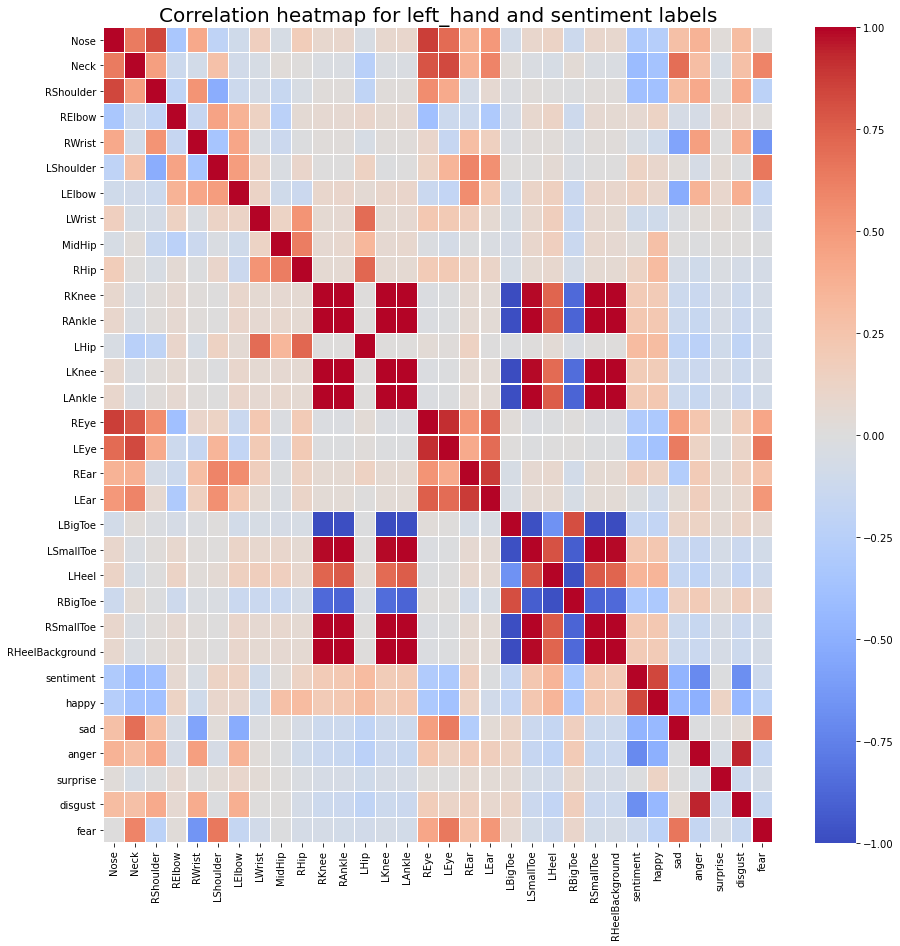

In [149]:
# Third
# Frequency and amplitude of pose movement (arms, shoulder, neck, chest) correlates strongly ($>$0.5) with positive sentiment. (H3)
# Heatmap
# Correlation among all columns
correlation_data = pd.DataFrame(np.hstack([mean_pose, train_data[order.get('label')].numpy()]), columns=pose_cat+label_cat)
# Removing columns with 0 variance
correlation_data = correlation_data.loc[:, (correlation_data != correlation_data.iloc[0]).any()]
# See correlation and rounding
matrix = correlation_data.corr(method="pearson").round(2)

# Plotting
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(matrix,
            yticklabels=True, 
            vmax=1, 
            vmin=-1, 
            cmap = sns.color_palette("coolwarm", as_cmap=True), 
            center=0,  
            linewidths=0.1)

plt.title("Correlation heatmap for left_hand and sentiment labels", fontdict={'fontsize':20})
plt.show()


cols = [
 'Nose',
 'RShoulder',
 'RElbow',
 'RWrist',
 'LShoulder',
 'LElbow',
 'LWrist']

results = add_measures(cols, results)

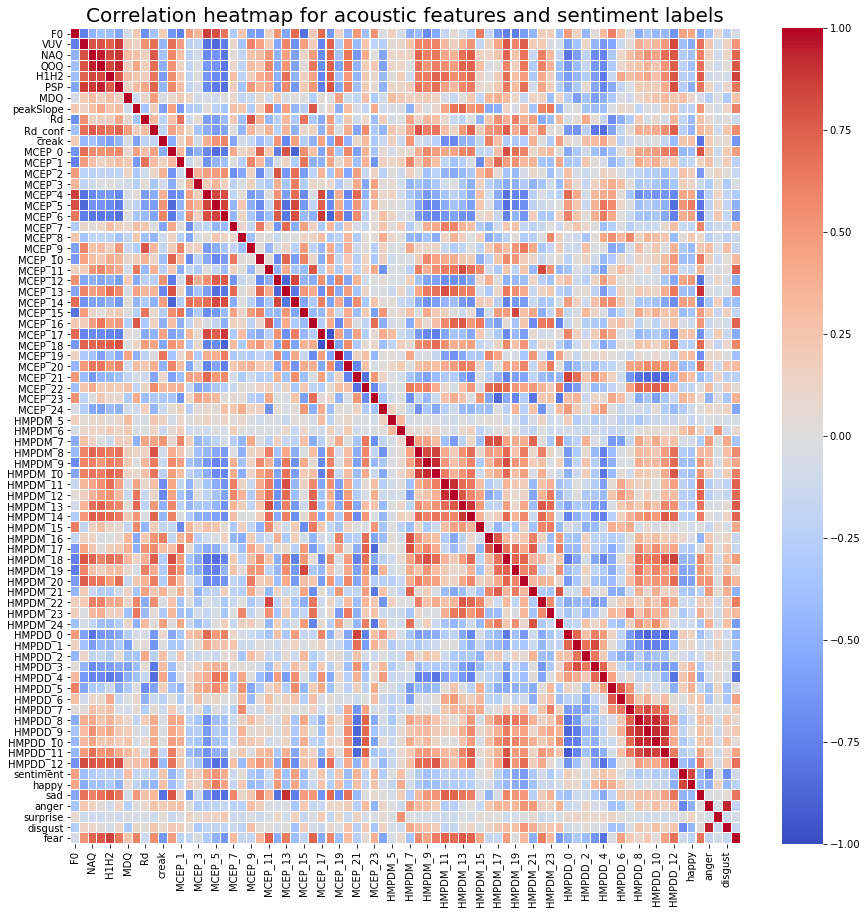

In [150]:
# Pitch correlates strongly (>0.5) with positive sentiment. (H3)
# Heatmap
# Correlation among all columns
correlation_data = pd.DataFrame(np.hstack([mean_acoustic, train_data[order.get('label')].numpy()]), columns=acoustic_cat+label_cat)
# Removing columns with 0 variance
correlation_data = correlation_data.loc[:, (correlation_data != correlation_data.iloc[0]).any()]
# See correlation and rounding
matrix = correlation_data.corr(method="pearson").round(3)

# Plotting
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(matrix,
            yticklabels=True, 
            vmax=1, 
            vmin=-1, 
            cmap = sns.color_palette("coolwarm", as_cmap=True), 
            center=0,  
            linewidths=0.1)

plt.title("Correlation heatmap for acoustic features and sentiment labels", fontdict={'fontsize':20})
plt.show()


cols = acoustic_cat[:35]

results = add_measures(cols, results)


In [151]:
action_units

{'AU1': 'Inner brow raiser',
 'AU2': 'Outer brow raiser',
 'AU4': 'Brow lowerer',
 'AU5': 'Upper lid raiser',
 'AU6': 'Cheek raiser',
 'AU7': 'Lid tightener',
 'AU9': 'Nose wringler',
 'AU10': 'Upper lip raiser',
 'AU12': 'Lip corner puller',
 'AU14': 'Dimpler',
 'AU15': 'Lip corner depressor',
 'AU17': 'Chin raiser',
 'AU20': 'Lip stretched',
 'AU23': 'Lip tightener',
 'AU25': 'Lips part',
 'AU26': 'Jaw drop',
 'AU28': 'Lip suck',
 'AU45': 'Blink'}

In [152]:
print(results.to_latex(index=False))  

\begin{tabular}{llllllll}
\toprule
  Features &    Sentiment &        Happy &          Sad &     Surprise &         Fear &         Anger &      Disgust \\
\midrule
       AU1 & -0.33 (0.19) & -0.39 (0.11) &  0.53 (0.02) & -0.07 (0.78) &   0.2 (0.43) &   0.07 (0.79) &   0.0 (0.99) \\
       AU2 &   -0.4 (0.1) & -0.44 (0.07) &  0.53 (0.02) & -0.09 (0.71) &  0.19 (0.44) &   0.34 (0.17) &  0.34 (0.16) \\
       AU4 & -0.12 (0.64) & -0.07 (0.78) &  0.17 (0.49) &  -0.06 (0.8) &  -0.2 (0.43) &  -0.03 (0.91) &  -0.1 (0.71) \\
      AU10 & -0.25 (0.32) & -0.19 (0.45) &   0.66 (0.0) & -0.04 (0.86) &  0.31 (0.21) &   -0.2 (0.42) & -0.14 (0.57) \\
      AU12 & -0.38 (0.12) & -0.49 (0.04) &  0.43 (0.07) &  0.04 (0.88) & -0.01 (0.96) &   0.23 (0.37) &  0.17 (0.49) \\
      AU15 &  0.12 (0.64) &  0.08 (0.77) & -0.21 (0.39) & -0.03 (0.92) &  0.28 (0.25) &    0.17 (0.5) &  0.07 (0.79) \\
      AU20 & -0.39 (0.11) & -0.62 (0.01) &  0.47 (0.05) & -0.05 (0.86) &  0.43 (0.07) &   0.14 (0.57) &  0.09 (0.72)

<ipython-input-152-3e3c5cf12fd9>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.to_latex(index=False))


In [153]:
results

,Features,Sentiment,Happy,Sad,Surprise,Fear,Anger,Disgust
0,AU1,-0.33 (0.19),-0.39 (0.11),0.53 (0.02),-0.07 (0.78),0.2 (0.43),0.07 (0.79),0.0 (0.99)
1,AU2,-0.4 (0.1),-0.44 (0.07),0.53 (0.02),-0.09 (0.71),0.19 (0.44),0.34 (0.17),0.34 (0.16)
2,AU4,-0.12 (0.64),-0.07 (0.78),0.17 (0.49),-0.06 (0.8),-0.2 (0.43),-0.03 (0.91),-0.1 (0.71)
3,AU10,-0.25 (0.32),-0.19 (0.45),0.66 (0.0),-0.04 (0.86),0.31 (0.21),-0.2 (0.42),-0.14 (0.57)
4,AU12,-0.38 (0.12),-0.49 (0.04),0.43 (0.07),0.04 (0.88),-0.01 (0.96),0.23 (0.37),0.17 (0.49)
5,AU15,0.12 (0.64),0.08 (0.77),-0.21 (0.39),-0.03 (0.92),0.28 (0.25),0.17 (0.5),0.07 (0.79)
6,AU20,-0.39 (0.11),-0.62 (0.01),0.47 (0.05),-0.05 (0.86),0.43 (0.07),0.14 (0.57),0.09 (0.72)
7,AU23,-0.11 (0.67),-0.0 (0.98),-0.01 (0.95),0.04 (0.87),-0.48 (0.04),0.05 (0.84),-0.03 (0.91)
8,AU25,-0.42 (0.08),-0.63 (0.01),0.52 (0.03),-0.11 (0.67),0.27 (0.28),0.11 (0.67),0.06 (0.83)
9,AU28,-0.3 (0.22),-0.28 (0.27),0.22 (0.38),-0.03 (0.91),-0.39 (0.11),0.15 (0.55),0.11 (0.66)
